#import dependencies

In [0]:
import matplotlib.pyplot as plt #for general visualizations
import seaborn as sns #much better visualizations
import numpy as np #for mathematical operations
import pandas as pd #for working with .csv file
import time #python time library
#keep every visualization inside the browser window
%matplotlib inline 

# Dataset

In [0]:
dataset = pd.read_csv('breast_cancer_data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## About Dataset (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Attribute Information:

1) ID number 

2) Diagnosis (M = malignant, B = benign) 

3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)



## seperate data and target from dataset

In [5]:
targets = dataset.diagnosis #access diagnosis column data and assign the values to the target variable
# now lets make a list of unwanted columns
list = ['Unnamed: 32','id','diagnosis']
# lets remove or drop this list
data = dataset.drop(list,axis = 1)
# and now check the shape of dataset
data.shape

(569, 30)

previously it had 33 columns but 3 dropped so we have 30 columns now

### Now let's see the updated target(M stands for malignant and B stands for bening)

In [6]:
print(targets)

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


### Now check if dataset is balanced

No. of Benign:  357
No. of malignant:  212


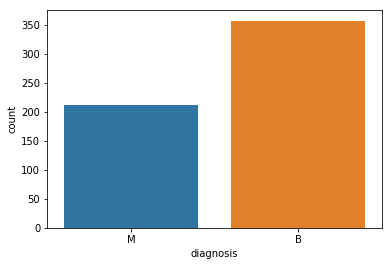

In [7]:
#boxplot/countplot using seaborn library
ax = sns.countplot(targets,label="count")
#print the total no.s of malignant & bening patients
B, M = targets.value_counts()
print('No. of Benign: ',B)
print('No. of malignant: ',M)

# correlation of each feature and our target variable

how good we predict the target using correlation features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

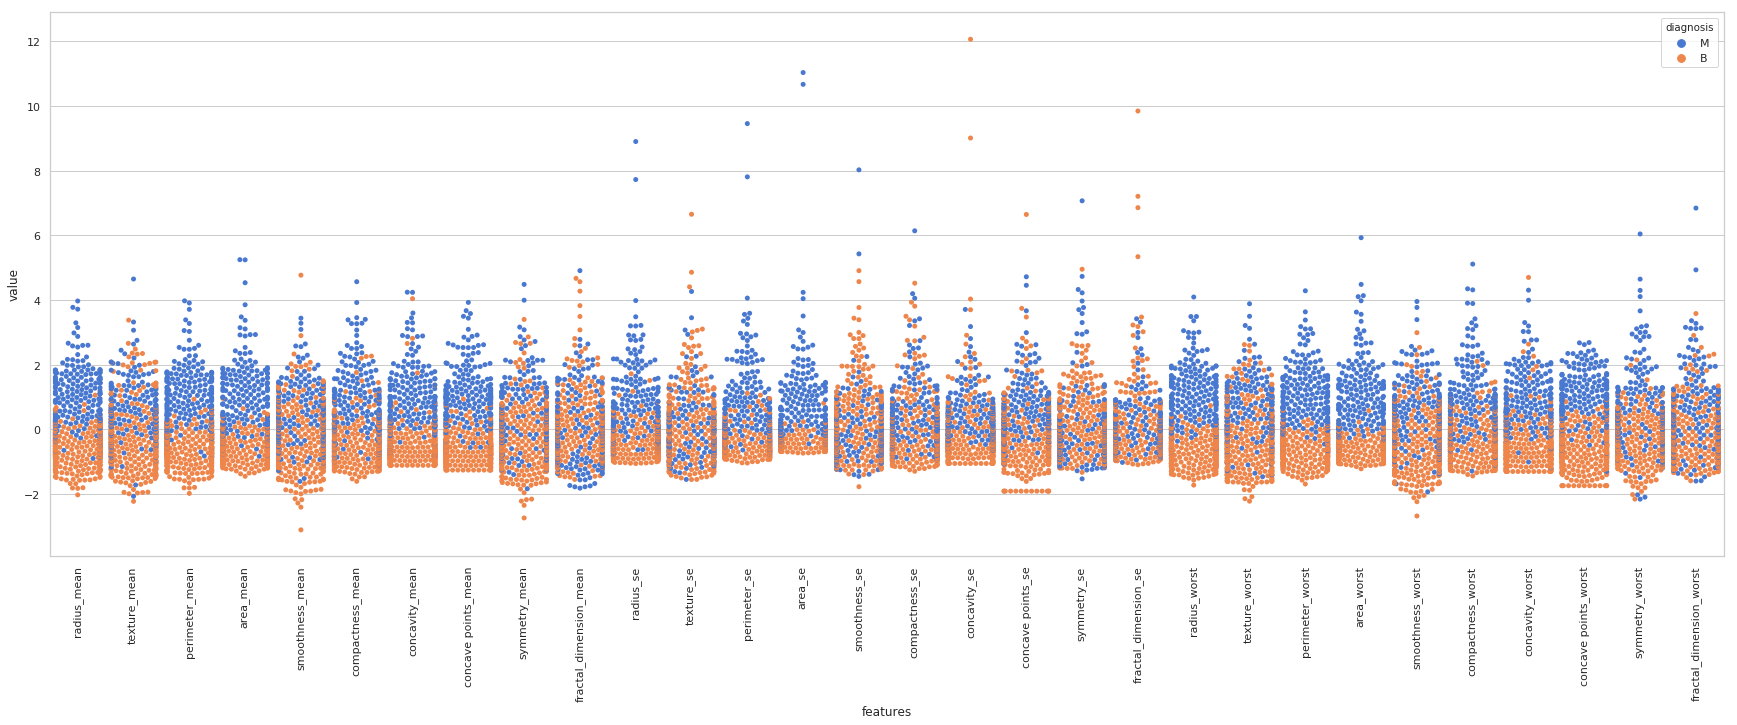

In [8]:
#let's set the style for the seaborn graph
sns.set(style="whitegrid", palette="muted")
#get the targets
data_dia = targets #data diameter
#data normalization for plotting
data_n = (data - data.mean()) / (data.std())
#get all the features
data_vis = pd.concat([targets,data_n.iloc[:,0:30]],axis = 1)
#let's flat the dataset
data_vis = pd.melt(data_vis,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(30,10)) 
tic = time.time()
sns.swarmplot(x="features", y ="value", hue="diagnosis", data=data_vis)

plt.xticks(rotation=90)

for example, here radius_mean is well separated but fractal_dimension_mean is not well separated which will not help us much

# Data preprocessing